In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\TOPE\Desktop\IMDB-Movie-Data.csv")



In [3]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


### Which year Has The Highest Average Voting?

In [4]:

# Group by 'Year' and calculate the mean of 'Votes'
average_votes_by_year = df.groupby('Year')['Votes'].mean()

# Find the year with the highest average voting
year_highest_average_voting = average_votes_by_year.idxmax()
year_highest_average_voting

2012

### In which year there was the Highest Average Revenue?

In [6]:
# Group by 'Year' and calculate the mean of 'Votes'
average_votes_by_year = df.groupby('Year')['Votes'].mean()

# Find the year with the highest average voting
year_highest_average_voting = average_votes_by_year.idxmax()
year_highest_average_voting

2012

### Find The Average Rating For Each Director

In [7]:
# Group by 'Director' and calculate the mean of 'Rating'
average_rating_by_director = df.groupby('Director')['Rating'].mean()

# Reset the index to make 'Director' a regular column
average_rating_by_director = average_rating_by_director.reset_index()
average_rating_by_director

,Director,Rating
0,Aamir Khan,8.50
1,Abdellatif Kechiche,7.80
2,Adam Leon,6.50
3,Adam McKay,7.00
4,Adam Shankman,6.30
...,...,...
639,Xavier Dolan,7.55
640,Yimou Zhang,6.10
641,Yorgos Lanthimos,7.20
642,Zack Snyder,7.04


### Display(visualize )Top 10 Lengthy Movies Titles and Runtime

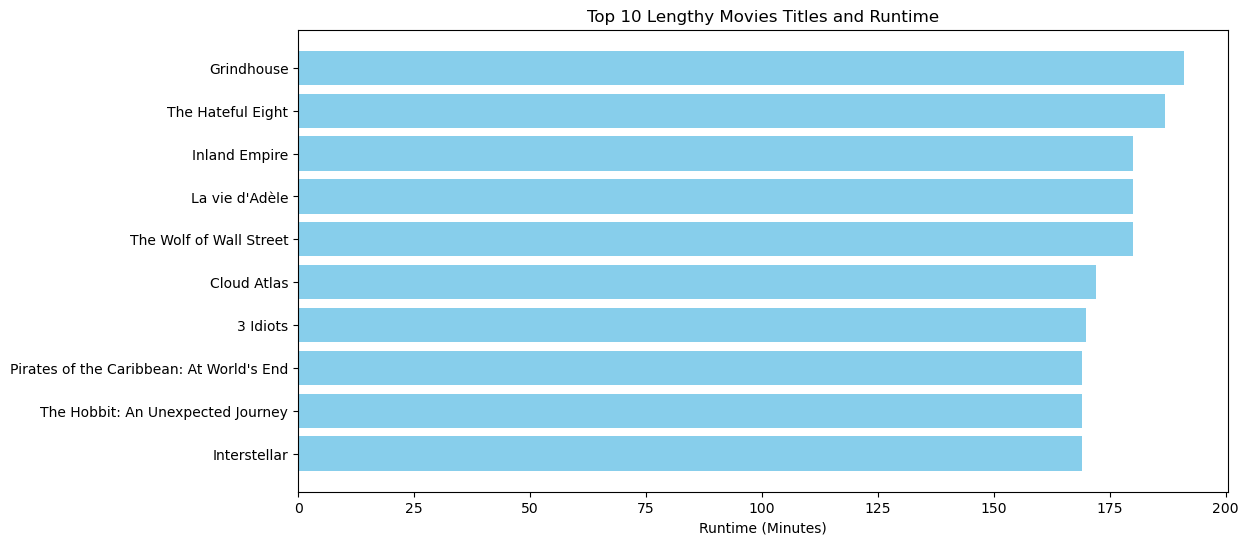

In [8]:
# Sort the DataFrame by 'Runtime (Minutes)' in descending order and select the top 10
top_10_lengthy_movies = df.sort_values(by='Runtime (Minutes)', ascending=False).head(10)

# Extract titles and runtimes
titles = top_10_lengthy_movies['Title']
runtimes = top_10_lengthy_movies['Runtime (Minutes)']

# Create a bar plot to visualize the data
plt.figure(figsize=(12, 6))
plt.barh(titles, runtimes, color='skyblue')
plt.xlabel('Runtime (Minutes)')
plt.title('Top 10 Lengthy Movies Titles and Runtime')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

###  Display(visualize )Number Of Movies Per Year 

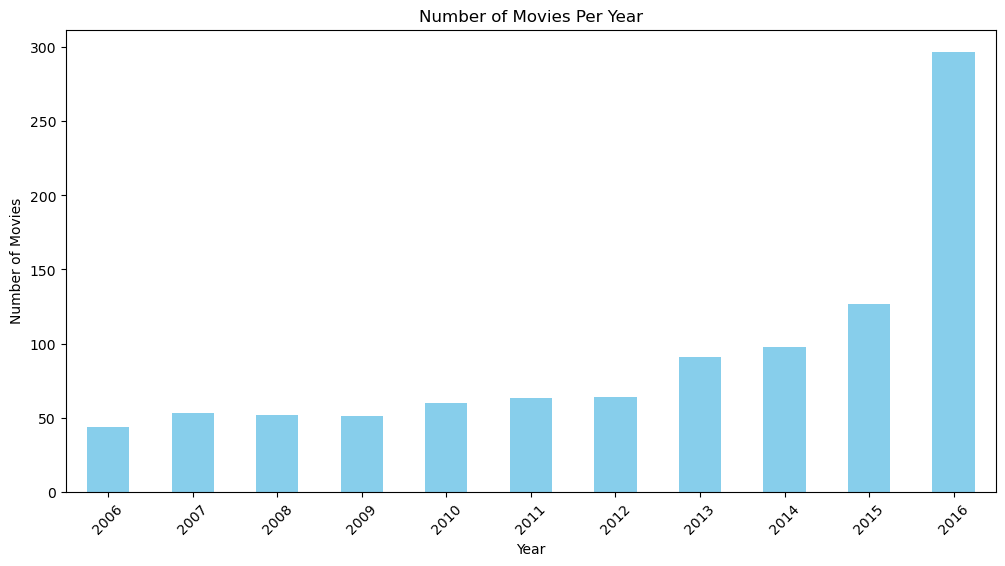

In [9]:
# Group the dataset by 'Year' and count the number of movies in each year
movies_per_year = df['Year'].value_counts().sort_index()

# Create a bar plot to visualize the data
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



###  To Find The Most Popular Movie Title

In [11]:

# Create a popularity score by multiplying 'Rating' and 'Votes'
df['Popularity'] = df['Rating'] * df['Votes']

# Find the movie with the highest popularity score
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]

# Extract the title of the most popular movie
most_popular_title = most_popular_movie['Title'].values[0]
most_popular_title

'The Dark Knight'

### Display Top 10 Highest Rated Movie Titles And Its Directors

In [12]:
# Sort the DataFrame by 'Rating' in descending order and select the top 10
top_10_highest_rated = df.sort_values(by='Rating', ascending=False).head(10)

# Extract titles and directors
titles = top_10_highest_rated['Title']
directors = top_10_highest_rated['Director']

# Create a DataFrame to display the top 10 highest-rated movies and their directors
top_10_highest_rated_movies = pd.DataFrame({'Title': titles, 'Director': directors})
top_10_highest_rated_movies

,Title,Director
54,The Dark Knight,Christopher Nolan
80,Inception,Christopher Nolan
117,Dangal,Nitesh Tiwari
36,Interstellar,Christopher Nolan
96,Kimi no na wa,Makoto Shinkai
249,The Intouchables,Olivier Nakache
133,Whiplash,Damien Chazelle
64,The Prestige,Christopher Nolan
99,The Departed,Martin Scorsese
991,Taare Zameen Par,Aamir Khan


###  Display Top 10 Highest Revenue Movie Title


In [15]:
# Sort the DataFrame by 'Revenue (Millions)' in descending order and select the top 10
top_10_highest_revenue_movies = df.sort_values(by='Revenue (Millions)', ascending=False).head(10)
top_10_highest_revenue_movies

# Extract movie titles
movie_titles = top_10_highest_revenue_movies['Title']

In [17]:

# Sort the DataFrame by 'Revenue (Millions)' in descending order and select the top record
highest_revenue_movie = df.sort_values(by='Revenue (Millions)', ascending=False).iloc[0]

# Extract the title of the movie with the highest revenue
highest_revenue_title = highest_revenue_movie['Title']
highest_revenue_title

'Star Wars: Episode VII - The Force Awakens'

###  Find The Average Rating Of Movies Year Wise

In [21]:
# Group the dataset by 'Year' and calculate the mean of 'Rating' for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean()
average_rating_per_year 

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

### Count the Number Of Action Movies

In [23]:

# Count the number of action movies
num_action_movies = df['Genre'].str.contains('Action').sum()
num_action_movies

303

###  Find Unique Values From Genre

In [27]:
# Find unique values in the 'Genre' column
unique_genres = df['Genre'].unique()
unique_genres

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T